## Regression Assignment: Predicting the actual value of the prospective properties

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia.

### Importing Libraries and Data

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm  

C:\Users\manish.bisht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Importing dataset
house_data = pd.read_csv('train.csv')
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_data.shape

(1460, 81)

### Data Cleaning and Preparation

In [4]:
# summing up the missing values (column-wise)
round(100*(house_data.isnull().sum()/len(house_data.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [5]:
#Replace NA with some meaning full variable where NA has some significance
#By looking at Data dictionary NA in following column has some meaning
Na_Column = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
#Give them some value to replace NA
#imputing NA by 'Not Present'
for column in Na_Column:
    house_data[column].fillna('Not Present', inplace=True)

In [6]:
# summing up the missing values (column-wise)
round(100*(house_data.isnull().sum()/len(house_data.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu       0.00
GarageType        0.00
GarageYrBlt       5.55
GarageFinish      0.00
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [7]:
#Removing the column with more than equals to 15% null values
house_data_with_null_percent = round(100*(house_data.isnull().sum()/len(house_data.index)), 2)
remove_feature = house_data_with_null_percent[house_data_with_null_percent > 15 ].index
house_data.drop(remove_feature, axis=1, inplace=True)
remove_feature

Index(['LotFrontage'], dtype='object')

In [8]:
#Removing the rows with null values
house_data.dropna(axis = 0, inplace = True)

In [9]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 1459
Data columns (total 80 columns):
Id               1370 non-null int64
MSSubClass       1370 non-null int64
MSZoning         1370 non-null object
LotArea          1370 non-null int64
Street           1370 non-null object
Alley            1370 non-null object
LotShape         1370 non-null object
LandContour      1370 non-null object
Utilities        1370 non-null object
LotConfig        1370 non-null object
LandSlope        1370 non-null object
Neighborhood     1370 non-null object
Condition1       1370 non-null object
Condition2       1370 non-null object
BldgType         1370 non-null object
HouseStyle       1370 non-null object
OverallQual      1370 non-null int64
OverallCond      1370 non-null int64
YearBuilt        1370 non-null int64
YearRemodAdd     1370 non-null int64
RoofStyle        1370 non-null object
RoofMatl         1370 non-null object
Exterior1st      1370 non-null object
Exterior2nd      1370 non-

### Dummy Variable Creation

In [10]:
categorical_Columns = house_data.select_dtypes(include=['object']).columns
categorical_Columns = categorical_Columns.insert(0,'MSSubClass') # It is also categorical
for col in categorical_Columns:
    dumm = pd.get_dummies(house_data[col], prefix=col, drop_first = True)
    house_data.drop([col], axis=1, inplace=True)
    house_data = pd.concat([house_data,dumm], axis=1)
house_data.head()   

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,2,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,3,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,4,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,5,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


### Model Creation

### Dividing into X and Y sets for the model building

In [11]:
#Dividing into X and Y sets for the model building
y = house_data.pop('SalePrice')
X = house_data

### Rescaling the Features 

We will use MinMax scaling.

In [12]:
#Initializing scaler
scaler = MinMaxScaler()

In [13]:
X = pd.DataFrame(scaler.fit_transform(X))

In [14]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

## Ridge and Lasso Regression

## Ridge Regression

In [15]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [16]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.080518,0.139278,0.000700,0.000400,0.0001,{'alpha': 0.0001},-24707.926220,-21002.488614,-19420.443902,-17741.401589,...,-20804.344683,2310.396924,24,-11216.212064,-11808.432439,-11596.565852,-11570.694830,-11654.654399,-11569.311917,194.877479
1,0.010603,0.000802,0.000599,0.000489,0.001,{'alpha': 0.001},-24728.118772,-20977.063136,-19333.225812,-17663.363569,...,-20738.754775,2343.924055,23,-11220.474472,-11814.940662,-11605.392687,-11567.790604,-11663.725927,-11574.464870,196.013479
2,0.011202,0.000745,0.000499,0.000446,0.01,{'alpha': 0.01},-24839.354201,-20861.080992,-18923.373976,-17414.057394,...,-20447.258816,2492.849607,22,-11252.428061,-11860.750181,-11735.939190,-11624.379418,-11823.005895,-11659.300549,219.097961
3,0.011204,0.000405,0.000699,0.000399,0.05,{'alpha': 0.05},-24617.167430,-20612.498471,-18612.886072,-18050.570845,...,-20309.195396,2328.436066,21,-11387.543475,-11983.770698,-12424.949808,-12261.521544,-12529.181000,-12117.393305,408.771044
4,0.011200,0.000927,0.000599,0.000201,0.1,{'alpha': 0.1},-24224.764690,-20422.598209,-18383.723624,-18273.925190,...,-20195.726094,2171.442171,20,-11566.143485,-12115.033951,-12968.546853,-12774.018616,-13032.058087,-12491.160198,565.261763


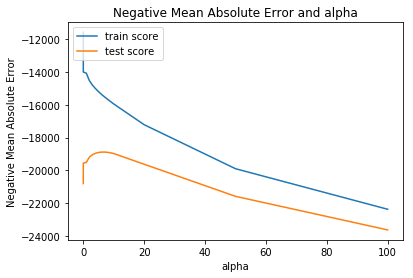

In [17]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [18]:
ridge = Ridge(alpha=5)
ridge.fit(X_train, y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [19]:
#Taking top 10 variables
rfe = RFE(ridge,10)             
rfe = rfe.fit(X_train, y_train)

In [20]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [21]:
ridge.fit(X_train_rfe, y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
ridge.coef_

array([ 55948.35161516, 150758.50843494,  61783.34194013,  65126.04228672,
        84693.09281232, -66627.28589553,  66277.09764041,  68406.3924806 ,
        52585.73708689,  58201.23659435])

## Lasso

In [23]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


C:\Users\manish.bisht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\manish.bisht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\manish.bisht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\manish.bisht\AppData\Local\Continuum\anaconda3\lib\site-packa

C:\Users\manish.bisht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\manish.bisht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\manish.bisht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\manish.bisht\AppData\Local\Continuum\anaconda3\lib\site-packa

C:\Users\manish.bisht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\manish.bisht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\manish.bisht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\manish.bisht\AppData\Local\Continuum\anaconda3\lib\site-packa

C:\Users\manish.bisht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\manish.bisht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\manish.bisht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\manish.bisht\AppData\Local\Continuum\anaconda3\lib\site-packa

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [24]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.227145,0.055095,0.000700,0.000400,0.0001,{'alpha': 0.0001},-25924.217883,-21027.317098,-19208.136372,-18149.234523,...,-22205.771795,3492.606280,27,-11229.652054,-11826.716435,-11621.900830,-11576.450531,-11648.923387,-11580.728648,195.001918
1,0.241327,0.069106,0.000700,0.000748,0.001,{'alpha': 0.001},-25923.303084,-21028.269127,-19205.344297,-18148.836021,...,-22205.021404,3492.765806,26,-11229.652071,-11826.739160,-11621.875793,-11576.417325,-11648.884304,-11580.713731,195.004001
2,0.200404,0.021631,0.000799,0.000245,0.01,{'alpha': 0.01},-25914.219260,-21037.784728,-19163.943119,-18145.448601,...,-22194.998122,3496.664206,25,-11229.794490,-11827.142196,-11621.803453,-11576.476067,-11648.903966,-11580.824034,195.052543
3,0.218099,0.029871,0.000900,0.000201,0.05,{'alpha': 0.05},-25875.728594,-21065.602619,-19064.621508,-18138.044751,...,-22166.734574,3499.696102,24,-11231.076671,-11829.490349,-11622.003394,-11577.325184,-11649.932439,-11581.965607,195.261666
4,0.202098,0.024207,0.000801,0.000245,0.1,{'alpha': 0.1},-25798.587830,-21097.793536,-19002.635353,-18121.405509,...,-22136.497162,3489.208267,23,-11232.972462,-11832.247178,-11622.192535,-11578.782574,-11651.213916,-11583.481733,195.371058


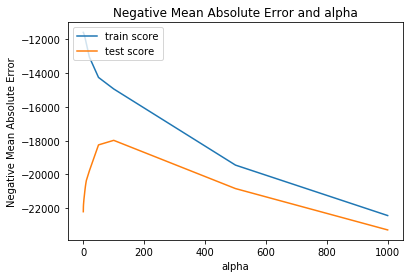

In [25]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [26]:
lasso = Lasso(alpha=100)
lasso.fit(X_train, y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
lasso.coef_

array([-7.97021607e+02,  3.77191927e+04,  8.99440222e+04,  2.12059655e+04,
        2.77681362e+03,  6.87233465e+03,  1.09578657e+04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.62565182e+05,  1.63234262e+04,
       -0.00000000e+00,  2.51545501e+04,  1.01116071e+04, -0.00000000e+00,
       -2.75008611e+04,  4.13224863e+04,  4.95531189e+03,  0.00000000e+00,
        3.19324190e+04,  1.56441319e+03,  1.62454066e+04,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.67723340e+04, -0.00000000e+00,
       -0.00000000e+00, -7.77075100e+02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -9.55411773e+03, -9.98099458e+03, -3.85566680e+03, -0.00000000e+00,
       -1.94835277e+03,  2.26429731e+03,  0.00000000e+00,  0.00000000e+00,
       -4.69061588e+03,  